<a href="https://colab.research.google.com/github/Chickyonline/Chickyonline/blob/main/Multiclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

# This is a colab notebook (Selected from + Text menu)

# Google colab FAQ

In [1]:
# This Step of unziping the zip file into its component files in my personal google drive is completed. So commenting it out from running again.
# !unzip "drive/MyDrive/Colab Notebooks/Dogbreed-Id/dog-breed-identification(1).zip" -d "drive/MyDrive/Colab Notebooks/Dogbreed-Id/"

Streaming output truncated to the last 5000 lines.
  inflating: drive/MyDrive/Colab Notebooks/Dogbreed-Id/train/83bc62b0fffa99a9c94ba0b67a5f7395.jpg  
  inflating: drive/MyDrive/Colab Notebooks/Dogbreed-Id/train/83bcff6b55ee179a7c123fa6103c377a.jpg  
  inflating: drive/MyDrive/Colab Notebooks/Dogbreed-Id/train/83be6d622ab74a5e7e08b53eb8fd566a.jpg  
  inflating: drive/MyDrive/Colab Notebooks/Dogbreed-Id/train/83c2d7419b0429b9fe953bc1b6cddbec.jpg  
  inflating: drive/MyDrive/Colab Notebooks/Dogbreed-Id/train/83cf7d7cd2a759a93e2ffd95bea9c6fb.jpg  
  inflating: drive/MyDrive/Colab Notebooks/Dogbreed-Id/train/83d405858f0931722ef21e8ac0adee4d.jpg  
  inflating: drive/MyDrive/Colab Notebooks/Dogbreed-Id/train/83d4125a4c3c7dc5956563276cb1cd74.jpg  
  inflating: drive/MyDrive/Colab Notebooks/Dogbreed-Id/train/83f0bb565b2186dbcc6a9d009cb26ff2.jpg  
  inflating: drive/MyDrive/Colab Notebooks/Dogbreed-Id/train/83fad0718581a696132c96c166472627.jpg  
  inflating: drive/MyDrive/Colab Notebooks/Dogbre

In [4]:
labels_csv = pd.read_csv("drive/MyDrive/Colab Notebooks/Dogbreed-Id/labels.csv")
print(len(labels_csv))
print(labels_csv.describe())
print(labels_csv.head())

10222
                                      id               breed
count                              10222               10222
unique                             10222                 120
top     a0f32a4e0fcb8bcb6a38d41782fa8f13  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


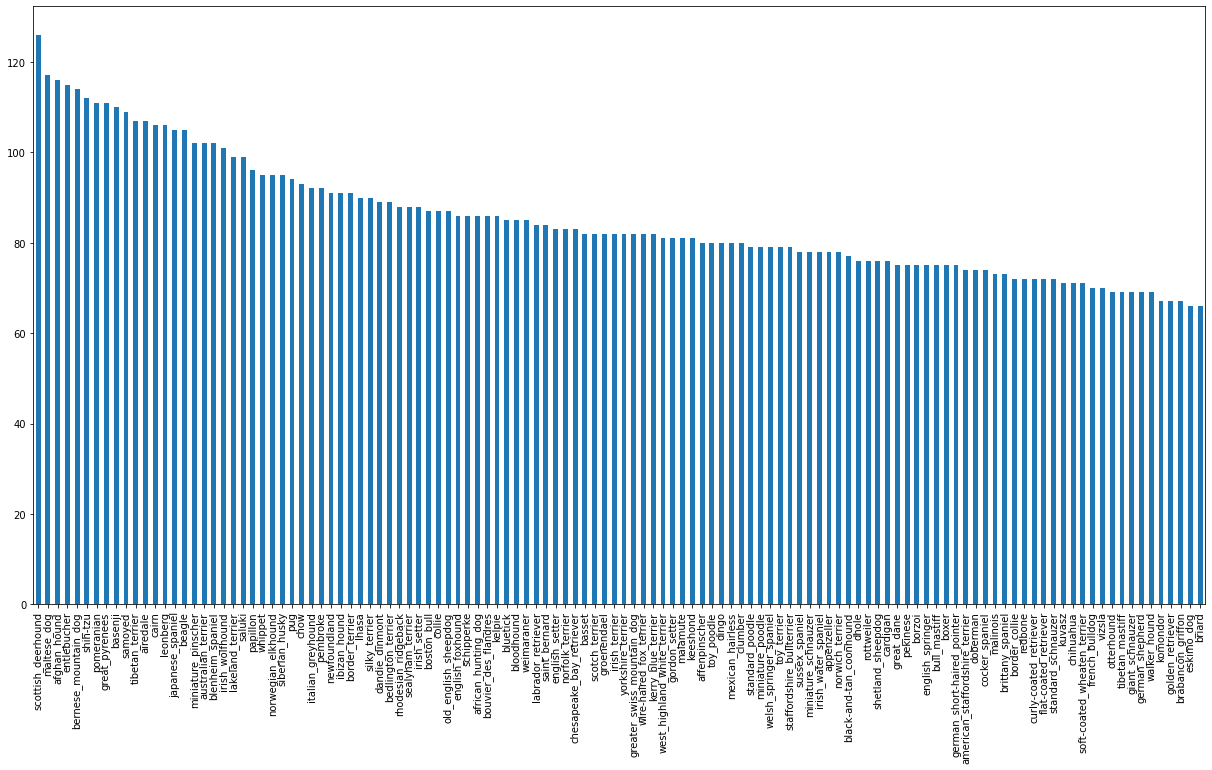

In [5]:
labels_csv["breed"].value_counts().plot.bar(figsize = (21, 11))

In [6]:
from IPython.display import display, Image

# 1) Try to create `a list` of file path to the images stored in google drive from the image id

In [8]:
filename = ["drive/MyDrive/Colab Notebooks/Dogbreed-Id/train/" + fname + ".jpg" for fname in labels_csv["id"]]
filename[:10]       # display first 10

['drive/MyDrive/Colab Notebooks/Dogbreed-Id/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Colab Notebooks/Dogbreed-Id/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Colab Notebooks/Dogbreed-Id/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/Colab Notebooks/Dogbreed-Id/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/Colab Notebooks/Dogbreed-Id/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/Colab Notebooks/Dogbreed-Id/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/Colab Notebooks/Dogbreed-Id/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/Colab Notebooks/Dogbreed-Id/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/Colab Notebooks/Dogbreed-Id/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/Colab Notebooks/Dogbreed-Id/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

Check if the number of file names match to the number of .jpg image files in training directory[link text](https://)

In [9]:
import os
if len(os.listdir("drive/MyDrive/Colab Notebooks/Dogbreed-Id/train/")) == len(filename):
  print("File names match to the number of image files")
else:
  print("File names do not match to number of image files : : check the zip file size and unzip completed or not")
  

File names match to the number of image files


In [12]:
filename[9001]

'drive/MyDrive/Colab Notebooks/Dogbreed-Id/train/e212cce60c302d24e8aaf0fb87ee0b2c.jpg'

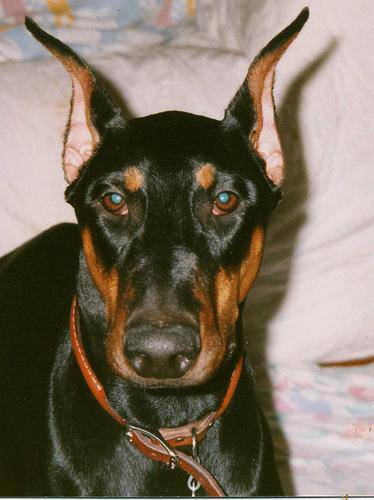

In [11]:
Image(filename[9001])

# 2) Try to create "a numpy array" of labels from labels_csv


In [14]:
import numpy as np
labels = labels_csv["breed"].to_numpy()     # convert labels column into a numpy array
labels [:10]


array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever',
       'bedlington_terrier', 'bedlington_terrier', 'borzoi', 'basenji',
       'scottish_deerhound'], dtype=object)

Check if the number of labels match to the number of ids. i.e. file names

In [15]:
if (len(labels)) == len(filename):
  print("Number of labels is equal to number of filenames!!")
else:
  print("Number of labels not equal to number of filenames - check data in training.csv")

Number of labels is equal to number of filenames!!


# 3) get the unique breads from labels. 
ML cannot work with strings, so we need to convert each of the labels to numbers. Compare each of the label to the unique dog breeds and create a list of boolean indicating which one is a real label (True) and which one is not (False)

In [16]:
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [17]:
print(labels[0])
labels[0] == unique_breeds  # Compare Label[0] with the 120 values of unique breeds and put True where label matches

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [21]:
# Turn every label into a boolean array
boolean_labels = [label == np.array(unique_breeds) for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [24]:
# Turning a boolean array into integers
print(labels[0])  # original label
print(np.where(unique_breeds == labels[0])[0][0])     # Index where label occurs
print (boolean_labels[0].argmax())      # Index where label occurs in the boolean array
print (boolean_labels[0].astype(int))   # print the array as 0 and 1 where the label occurs

boston_bull
19
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [25]:
# Setup X and Y variables
X = filename
y = boolean_labels